<a href="https://colab.research.google.com/github/aniruddhha/100-days-of-ml/blob/main/04_day_tf_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **✅ Linear Regression using tensorflow 2.0**

Model improvement

In [1]:
import tensorflow as tf
print(tf.__version__) 

2.9.2


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [4]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [5]:
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

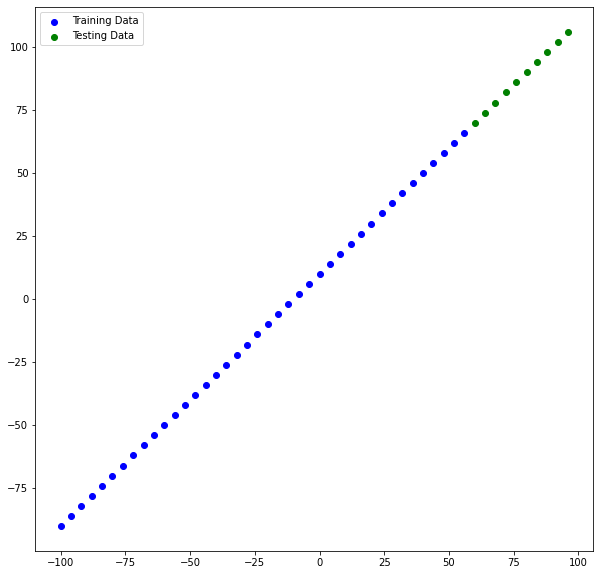

In [6]:
plt.figure(figsize=(10, 10))
plt.scatter(X_train, y_train, c ='b', label='Training Data')
plt.scatter(X_test, y_test, c ='g', label='Testing Data')
plt.legend()

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name = 'input_layer_1'),
    tf.keras.layers.Dense(100, name = 'input_layer_2'),
    tf.keras.layers.Dense(100, name = 'input_layer_3'),
    tf.keras.layers.Dense(1, name = 'output_layer')
], name = 'my_model')

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['mae'])

# model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

# model.summary()
model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 250, verbose = 0)

model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_1 (Dense)       (None, 100)               200       
                                                                 
 input_layer_2 (Dense)       (None, 100)               10100     
                                                                 
 input_layer_3 (Dense)       (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


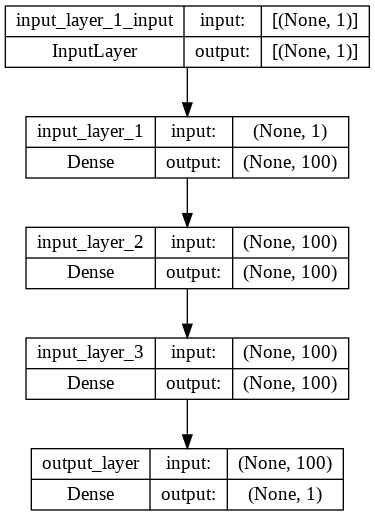

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes=True)

In [9]:
y_pred = model(X_test)

In [10]:
def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = y_pred
):
  plt.figure(figsize = (10,10))
  plt.scatter(train_data, train_labels, c='b', label = 'Training')
  plt.scatter(test_data, test_labels, c='g', label = 'Testing')
  plt.scatter(test_data, predictions, c='r', label = 'Predictions')
  plt.legend()

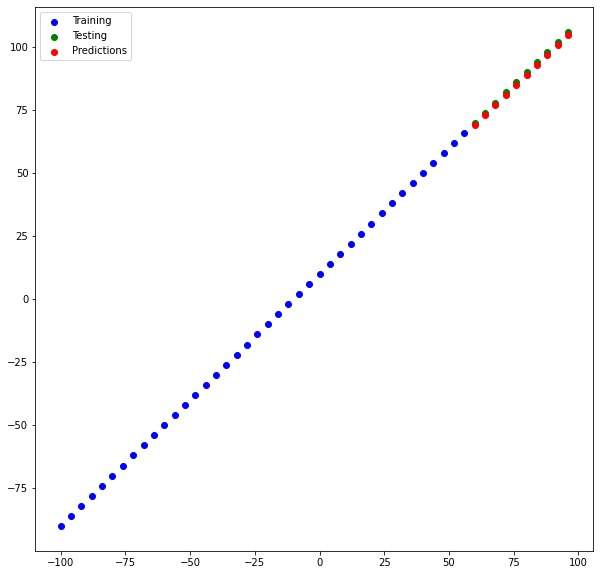

In [11]:
plot_predictions()

In [12]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 364ms/step - loss: 0.9012 - mae: 0.9012


[0.9011825323104858, 0.9011825323104858]

In [13]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [14]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.253044,  73.218765,  77.184494,  81.150215,  85.11596 ,
        89.08169 ,  93.04742 ,  97.01314 , 100.97887 , 104.944595],
      dtype=float32)>

In [15]:
tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.9011818>

In [16]:
tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.8218185>

In [17]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred)).numpy()

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred)).numpy()

In [18]:
mae(y_test, y_pred), mse(y_test, y_pred)

(0.9011818, 0.8218185)

14.836591
221.27563


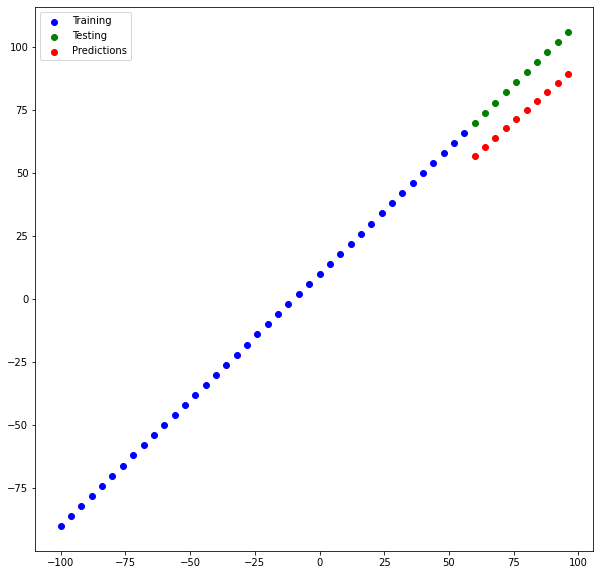

In [19]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name = 'input_layer_1'),
    tf.keras.layers.Dense(1, name = 'output_layer')
], name = 'my_model')

model1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['mae'])

# model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

# model.summary()
model1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 0)
y_pred_1 = model1(X_test)

mae1 = mae(y_test, y_pred_1)
print(mae1)
mse1 = mse(y_test, y_pred_1)
print(mse1)


plot_predictions(predictions = y_pred_1)


0.99104154
1.001435


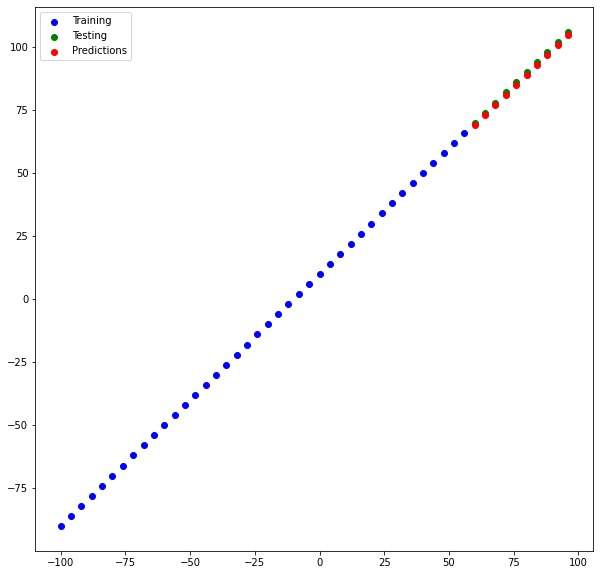

In [20]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name = 'input_layer_1'),
    tf.keras.layers.Dense(1, name = 'output_layer')
], name = 'my_model')

model2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['mae'])

# model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

# model.summary()
model2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 250, verbose = 0)

y_pred_2 = model2(X_test)

mae2 = mae(y_test, y_pred_2)
print(mae2)
mse2 = mse(y_test, y_pred_2)
print(mse2)

plot_predictions(predictions = y_pred_2)

0.3369751
0.11575687


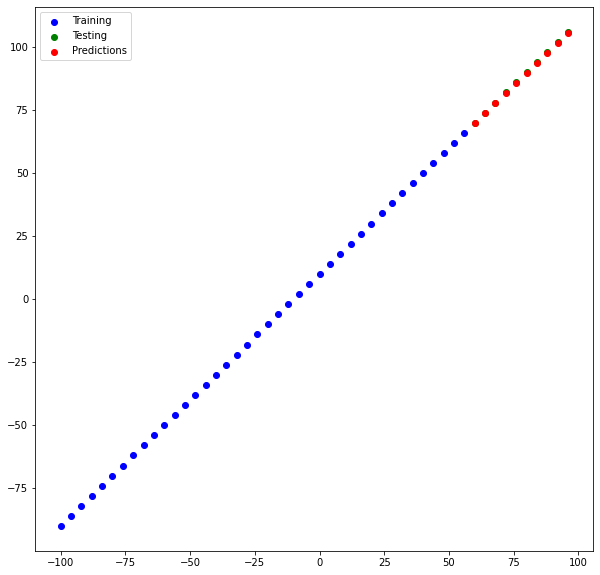

In [21]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name = 'input_layer_1'),
    tf.keras.layers.Dense(100, name = 'input_layer_2'),
    tf.keras.layers.Dense(1, name = 'output_layer')
], name = 'my_model')

model3.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['mae'])

# model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

# model.summary()
model3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 300, verbose = 0)

y_pred_3 = model3(X_test)

mae3 = mae(y_test, y_pred_3)
print(mae3)
mse3 = mse(y_test, y_pred_3)
print(mse3)

plot_predictions(predictions = y_pred_3)


In [22]:
import pandas as pd

model_results = [["model1", mae1, mse1],
                 ["model2", mae2, mse2],
                 ["model3", mae3, mse3]]
all_results = pd.DataFrame(model_results, columns =['Model', 'MAE', 'MSE'])
all_results

,Model,MAE,MSE
0,model1,14.836591,221.275635
1,model2,0.991042,1.001435
2,model3,0.336975,0.115757


In [23]:
model2.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_1 (Dense)       (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_1 (Dense)       (None, 100)               200       
                                                                 
 input_layer_2 (Dense)       (None, 100)               10100     
                                                                 
 input_layer_3 (Dense)       (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


In [25]:
model2.save('./my_SavedModel_format')

In [26]:
model2.save('./my_HDF5_format.h5')

In [27]:
saved_model_1 = tf.keras.models.load_model('my_SavedModel_format')
# saved_model_1.summary()

saved_pred_1 = saved_model_1.predict(X_test)
saved_pred_1 == y_pred_2

1/1 [==============================] - 0s 69ms/step


<tf.Tensor: shape=(10, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [28]:
saved_model_2 = tf.keras.models.load_model('my_HDF5_format.h5')
# saved_model_1.summary()

saved_pred_2 = saved_model_1.predict(X_test)
saved_pred_2 == y_pred_2

1/1 [==============================] - 0s 15ms/step


<tf.Tensor: shape=(10, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

In [ ]:
# download from download option menu

In [29]:
from google.colab import files
files.download('./my_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
# Save to google drive
!cp /content/my_HDF5_format.h5 /content/drive/MyDrive/training2.0/

cp: cannot create regular file '/content/drive/MyDrive/training2.0/': No such file or directory
